# <CENTER><div class="alert alert-block alert-info"><b> Segmentation des clients d'un site de e-commerce<br>Analyse exploratoire</b><div><CENTER>   
    

### Problématique:
- Comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles.
- Fournir une segmentation des clients utilisable pour une campagne de communication par une entreprise proposant une solution de vente sur les marketplaces en ligne .
 

### Source du jeu de données:
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

### Objectifs:
1. Faire une analyse exploratoire (présent notebook)
2. Utiliser des méthodes non supervisées pour regrouper des clients de profils similaires.
3. Faire des simulations pour déterminer la fréquence nécessaire des mises à jour du modèle de segmentation (analyse de la stabilité des segments au cours du temps).

### <a name="C0">Sommaire</a>

- <a href="#C1">1. Importation des librairies nécessaires et mise en place du module de vérification du format PEP8</a>
- <a href="#C2">2. Description des jeux de données</a>
    - <a href="#C21">2.1. Description de "olist_customers_dataset"</a>
    - <a href="#C22">2.2. Description de "olist_geolocation_dataset"</a>
    - <a href="#C23">2.3. Description de "olist_orders_dataset"</a>
    - <a href="#C24">2.4. Description de "olist_products_dataset"</a>
    - <a href="#C25">2.5. Description de "product_category_name_translation"</a>
    - <a href="#C26">2.6. Description de "olist_order_items_dataset"</a>
    - <a href="#C27">2.7. Description de "olist_order_payments_dataset"</a>
    - <a href="#C28">2.8. Description de "olist_order_reviews_dataset"</a>
    - <a href="#C29">2.9. Description de "olist_sellers_dataset"</a>
- <a href="#C3">3. Exploration et réarrangement du jeu de données</a>
    - <a href="#C31">3.1. Description du jeu de données</a>
    - <a href="#C32">3.2. Transformation des variables mentionnant une date en timestamp au lieu d'object</a>
    - <a href="#C33">3.3. Analyse exploratoire</a>
        - <a href="#C331">3.3.1. Nombre de commandes par clients</a>
        - <a href="#C332">3.3.2. Montant des commandes</a>
        - <a href="#C333">3.3.3. Date des commandes</a>
        - <a href="#C334">3.3.4. Score donnée par le client</a>
        - <a href="#C335">3.3.5. Analyse concernant les produits et leur catégories</a>
- <a href="#C4">4. Préparation de jeu de données pour la segmentation</a>
    - <a href="#C41">4.1. Jeu de données par commandes</a>
    - <a href="#C42">4.2. Jeu de données par clients</a>
        - <a href="#C421">4.2.1. Création du jeu de données</a>
        - <a href="#C422">4.2.2. Vérification des variables du jeu de données créé</a>

# <div class="alert alert-block alert-info"><a href="#C1">1. Importation des librairies nécessaires et mise en place du module de vérification du format PEP8</a></div>

In [1]:
# Mise en place du module de vérification du format PEP8
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode
import missingno as msno
import datetime

In [3]:
print("Dans ce notebook, les versions des packages utilisés sont:")
print("- Pandas", pd.__version__)
print("- matplotlib", matplotlib.__version__)
print("- Seaborn", sns.__version__)
print("- Numpy", np.__version__)
print("- missingno", msno.__version__)

Dans ce notebook, les versions des packages utilisés sont:
- Pandas 1.4.3
- matplotlib 3.5.2
- Seaborn 0.11.2
- Numpy 1.23.1
- missingno 0.5.1


In [4]:
# Propriétés communes des figures
sns.set()
# sns.set_theme(style="white", context="notebook")
sns.set_theme(style="ticks", context="notebook")
plt.rcParams['figure.dpi'] = 150
plt.rc('font', size=12)         # taille de la police de l'échelle des axes
plt.rc('axes', titlesize=18)     # taille de la police du titre
plt.rc('axes', labelsize=16)     # taille de la police du titre des axes
plt.rc('xtick', labelsize=12)   # taille de la police de l'échelle de l'axe x
plt.rc('ytick', labelsize=12)   # taille de la police de l'échelle de l'axe y
plt.rc('legend', fontsize=12)   # taille de la légende
plt.rc('figure', titlesize=18)  # taille du titre

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C2">2. Description des jeux de données</a></div>

## <div class="alert alert-block alert-info"><a name="C21">2.1. Description de "olist_customers_dataset"</a></div>

In [5]:
data_customers = pd.read_csv("olist_customers_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_customers.shape[0],
      "lignes et de",
      data_customers.shape[1],
      "colonnes.")

Le jeu de données se compose de 99441 lignes et de 5 colonnes.


In [7]:
# Connaitre le nombre de valeurs manquantes par variable
data_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
# Vérification de la présence de doublons pour "customer_id"
if data_customers.loc[data_customers[["customer_id"]].
                      duplicated(keep=False), :].empty:
    print("Pour la variable 'customer_id', il n'y a pas de doublon")
else:
    print("Pour la variable 'customer_id', les doublons sont")
    print(data_customers.loc[data_customers[["customer_id"]].
                             duplicated(keep=False), :])

# Vérification de la présence de doublons pour "customer_unique_id"
if data_customers.loc[data_customers[["customer_unique_id"]].
                      duplicated(keep=False), :].empty:
    print("Pour la variable 'customer_unique_id', il n'y a pas de doublon")
else:
    print("Pour la variable 'customer_unique_id', il y a",
          len(data_customers.loc[data_customers[["customer_unique_id"]].
                                 duplicated(keep=False), :]),
          "doublons")

Pour la variable 'customer_id', il n'y a pas de doublon
Pour la variable 'customer_unique_id', il y a 6342 doublons


Le jeu de données se compose de 99441 lignes et 5 colonnes. Il n'y a aucune valeur manquante. <br>
Des doublons sont présents pour la variable "customer_unique_id" indiquant que certains clients, identifiés par "customer_unique_id", ont réalisé plusieurs commandes, chaque commande étant identifiée par la variable 'customer_id'.

Combien de clients ont commandé à plusieurs reprises?

In [9]:
# Connaitre les nombre de "customer_unique_id" présent dans le jeu de données
nb_customer_total = len(data_customers["customer_unique_id"].unique())
print("Nombre de client total:", nb_customer_total)

# Connaitre le nombre de client n'ayant fait qu'une seule commande
nb_customer_single_order = len(data_customers.groupby("customer_unique_id").
                               size().loc[lambda x: x == 1].sort_values())
print("Nombre de client ayant une seule commande:", nb_customer_single_order)

# Connaitre le nombre de client ayant fait plusieurs commandes
nb_customer_several_order = len(data_customers.groupby("customer_unique_id").
                                size().loc[lambda x: x > 1].sort_values())
print("Nombre de client ayant plusieurs commandes:", nb_customer_several_order)

# Pourcentage de client ayant effectué plusieurs commandes
pourcentage_customer_single_order = ((nb_customer_single_order * 100)
                                     / nb_customer_total)

print("Pourcentage de clients ayant effectué une seule commande:",
      pourcentage_customer_single_order,
      "%")

# Pourcentage de client ayant effectué plusieurs commandes
pourcentage_customer_several_orders = ((nb_customer_several_order * 100)
                                       / nb_customer_total)

print("Pourcentage de clients ayant effectué plusieurs commandes:",
      pourcentage_customer_several_orders,
      "%")

Nombre de client total: 96096
Nombre de client ayant une seule commande: 93099
Nombre de client ayant plusieurs commandes: 2997
Pourcentage de clients ayant effectué une seule commande: 96.88124375624376 %
Pourcentage de clients ayant effectué plusieurs commandes: 3.118756243756244 %


In [10]:
# Pour m'assurer que les noms de villes n'ont pas de caractères spéciaux
data_customers["customer_city"] = data_customers["customer_city"].\
                                                apply(unidecode)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C22">2.2. Description de "olist_geolocation_dataset"</a></div>

In [11]:
data_geoloc = pd.read_csv("olist_geolocation_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_geoloc.shape[0],
      "lignes et de",
      data_geoloc.shape[1],
      "colonnes.")

Le jeu de données se compose de 1000163 lignes et de 5 colonnes.


In [13]:
# Connaitre le nombre de valeurs manquantes par variable
data_geoloc.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Il n'y a aucune valeur manquante.

In [14]:
# Vérification de la présence de doublons pour "geolocation_zip_code_prefix"
if data_geoloc.loc[data_geoloc[["geolocation_zip_code_prefix"]].
                   duplicated(keep=False), :].empty:
    print("Il n'y a pas de doublon")
else:
    print("Pour la variable 'geolocation_zip_code_prefix', il y a",
          len(data_geoloc.loc[data_geoloc[["geolocation_zip_code_prefix"]]
                              .duplicated(keep=False), :]),
          "doublons")

Pour la variable 'geolocation_zip_code_prefix', il y a 999120 doublons


Il y a beaucoup de zip_code_prefix présent plusieurs fois. Dans le jeu de données data_customers, ce sont les prefix qui sont utilisés. Pour chaque zip_code_prefix, je vais calculer la valeur médiane de la latitude et de la longitude.

In [15]:
# Connaitre le nombre de zip_code_prefix unique
print("Nombre de zip_code_prefix présent:",
      len(data_geoloc["geolocation_zip_code_prefix"].unique()))

Nombre de zip_code_prefix présent: 19015


In [16]:
# Vérification de la variable "city"
print(data_geoloc["geolocation_city"].unique())
print("Le nombre de ville est de",
      len(data_geoloc["geolocation_city"].unique()))

['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']
Le nombre de ville est de 8011


In [17]:
# Pour m'assurer que les noms de villes n'ont pas de caractères spéciaux
data_geoloc["geolocation_city"] = data_geoloc["geolocation_city"].\
                                  apply(unidecode)

print(data_geoloc["geolocation_city"].unique())
print("Le nombre de ville est de",
      len(data_geoloc["geolocation_city"].unique()))

['sao paulo' 'sao bernardo do campo' 'jundiai' ... 'floriano peixoto'
 'erebango' 'santa cecilia do sul']
Le nombre de ville est de 5969


<Figure size 576x432 with 0 Axes>

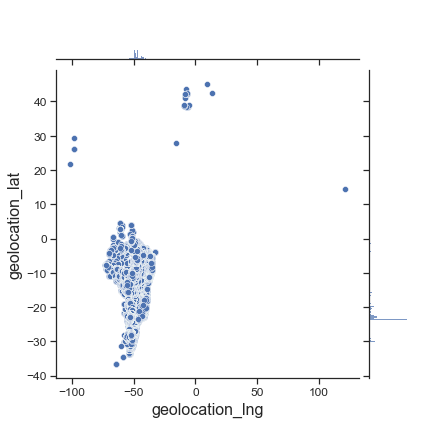

In [18]:
# Vérification des variables 'longitude' et 'latitude'
fig = plt.figure(figsize=(8, 6))

sns.jointplot(x="geolocation_lng",
              y="geolocation_lat",
              data=data_geoloc)

plt.show()

Avec ce graphique, il est possible d'observer que des outliers sont présents dans le jeu de données. Je choisi de les supprimer.

In [19]:
# Récupération des index des outliers
index = data_geoloc.index[(data_geoloc["geolocation_lat"] > 6)
                          | (data_geoloc["geolocation_lat"] < -33)
                          | (data_geoloc["geolocation_lng"] > -34)
                          | (data_geoloc["geolocation_lng"] < -75)]

# Suppression des outliers en utilisant la liste des index
data_geoloc.drop(index, axis=0, inplace=True)

In [20]:
# Connaitre le nombre de zip_code_prefix unique
print("Nombre de zip_code_prefix présent:",
      len(data_geoloc["geolocation_zip_code_prefix"].unique()))

Nombre de zip_code_prefix présent: 19007


Maintenant que les outliers ont été supprimé du jeu de données, je vais calculer les valeurs médianes de latitudes et longitudes pour chaque zip_code_prefix.

In [21]:
data_geoloc2 = data_geoloc.groupby(["geolocation_zip_code_prefix",
                                    "geolocation_city",
                                    "geolocation_state"])[
                                    ["geolocation_lat", "geolocation_lng"]].\
                                    median().reset_index()
data_geoloc2.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550381,-46.634027
1,1002,sao paulo,SP,-23.548551,-46.635072
2,1003,sao paulo,SP,-23.548977,-46.635313
3,1004,sao paulo,SP,-23.549535,-46.634771
4,1005,sao paulo,SP,-23.549612,-46.636532


In [22]:
# Pour savoir si des zip_code préfix sont présent en double
print("Nombre de zip_code_prefix présent:",
      len(data_geoloc2["geolocation_zip_code_prefix"].unique()))

Nombre de zip_code_prefix présent: 19007


In [23]:
data_med = data_geoloc2.groupby(["geolocation_zip_code_prefix",
                                 "geolocation_city",
                                 "geolocation_state"]).\
                                 size().reset_index(name='count').\
                                 drop_duplicates(subset='geolocation_zip_code_prefix').\
                                 drop("count", axis=1)

In [24]:
data_geoloc3 = data_med.merge(data_geoloc2,
                              on=["geolocation_zip_code_prefix",
                                  "geolocation_city",
                                  "geolocation_state"],
                              how="inner")

data_geoloc3.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550381,-46.634027
1,1002,sao paulo,SP,-23.548551,-46.635072
2,1003,sao paulo,SP,-23.548977,-46.635313
3,1004,sao paulo,SP,-23.549535,-46.634771
4,1005,sao paulo,SP,-23.549612,-46.636532


Le jeu de données geoloc3 contient désormais les informations par zip_code_prefix unique.
Je vais vérifier les données sur la longitude et la latitude.

<Figure size 576x432 with 0 Axes>

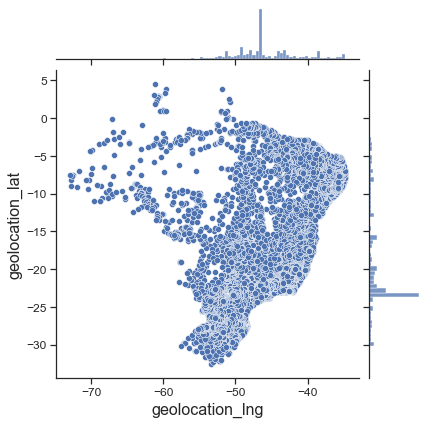

In [25]:
# Représentation graphique pour visualiser
fig = plt.figure(figsize=(8, 6))

sns.jointplot(x="geolocation_lng",
              y="geolocation_lat",
              data=data_geoloc3)

plt.show()

In [26]:
# Fusion de data_customers et data_geolocation3 en utilisant le zip_code_prefix
data1 = data_customers.merge(data_geoloc3,
                             left_on="customer_zip_code_prefix",
                             right_on="geolocation_zip_code_prefix",
                             how="left")
data1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,sao bernardo do campo,SP,-23.727299,-46.542631
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,sao paulo,SP,-23.531294,-46.656404
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,mogi das cruzes,SP,-23.497390,-46.182342
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,campinas,SP,-22.973309,-47.141530


In [27]:
# Suppression des colonnes inutiles
data1.drop(["geolocation_zip_code_prefix",
            "geolocation_city",
            "geolocation_state"], axis=1, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C23">2.3. Description de "olist_orders_dataset"</a></div>

In [28]:
data_orders = pd.read_csv("olist_orders_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_orders.shape[0],
      "lignes et de",
      data_orders.shape[1],
      "colonnes.")

Le jeu de données se compose de 99441 lignes et de 8 colonnes.


In [30]:
# Connaitre le nombre de valeurs manquantes par variable
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
# Vérification de la présence de doublons pour "customer_id"
if data_orders.loc[data_orders[["customer_id"]].
                   duplicated(keep=False), :].empty:
    print("Pour la variable 'customer_id', il n'y a pas de doublon")
else:
    print("Pour la variable 'customerr_id', il y a",
          len(data_orders.loc[data_orders[["customer_id"]].
                              duplicated(keep=False), :]),
          "doublons")

# Vérification de la présence de doublons pour "order_id"
if data_orders.loc[data_orders[["order_id"]].
                   duplicated(keep=False), :].empty:
    print("Pour la variable 'order_id', il n'y a pas de doublon")
else:
    print("Pour la variable 'order_id', il y a",
          len(data_orders.loc[data_orders[["order_id"]].
                              duplicated(keep=False), :]),
          "doublons")

Pour la variable 'customer_id', il n'y a pas de doublon
Pour la variable 'order_id', il n'y a pas de doublon


La variable "customer_id" est présente dans ce jeu de données ce qui va permettre de l'unir à data3

In [32]:
data2 = data1.merge(data_orders,
                    on="customer_id",
                    how="inner")
data2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C24">2.4. Description de "olist_products_dataset"</a></div>

In [33]:
data_products = pd.read_csv("olist_products_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_products.shape[0],
      "lignes et de",
      data_products.shape[1],
      "colonnes.")

Le jeu de données se compose de 32951 lignes et de 9 colonnes.


In [35]:
# Connaitre le nombre de valeurs manquantes par variable
data_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
# Vérification de la présence de doublons pour "product_id"
if data_products.loc[data_products[["product_id"]].
                     duplicated(keep=False), :].empty:
    print("Il n'y a pas de doublon")
else:
    print("Pour la variable 'product_id', il y a",
          len(data_products.loc[data_products[["product_id"]].
                                duplicated(keep=False), :]),
          "doublons")

Il n'y a pas de doublon


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C25">2.5. Description de "product_category_name_translation"</a></div>

In [37]:
data_translation = pd.read_csv("product_category_name_translation.csv")

# Afficher les 5 premières lignes du jeu de données
data_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [38]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_translation.shape[0],
      "lignes et de",
      data_translation.shape[1],
      "colonnes.")

Le jeu de données se compose de 71 lignes et de 2 colonnes.


In [39]:
# Connaitre le nombre de valeurs manquantes par variable
data_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [40]:
# Vérification de la présence de doublons pour "product_category_name"
if data_translation.loc[data_translation[["product_category_name"]].
                        duplicated(keep=False), :].empty:
    print("Il n'y a pas de doublon")
else:
    print("Pour la variable 'product_category_name', il y a",
          len(data_translation.loc[data_translation[["product_category_name"]].
                                   duplicated(keep=False), :]),
          "doublons")

Il n'y a pas de doublon


Afin d'avoir les catégories de produits en anglais et non en portugais, je vais unir ce jeu de données à data_products puis supprimer les variables en portugais

In [41]:
# Ajouter le nom des catégories de produits en anglais
data_product2 = data_products.merge(data_translation,
                                    on="product_category_name",
                                    how="left")

# Supprimer les noms des catégories en portugais
data_product2.drop(["product_category_name"],
                   axis=1,
                   inplace=True)

# Renommer la colonne 'product_category_name_english'
data_product2.rename(columns={"product_category_name_english":
                              "product_category"},
                     inplace=True)
data_product2.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [42]:
# Attribution de "unknow" pour les valeurs manquantes
data_product2.loc[data_product2["product_category"].isnull(),
                  "product_category"] = "unknow"

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C26">2.6. Description de "olist_order_items_dataset"</a></div>

In [43]:
data_order_items = pd.read_csv("olist_order_items_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [44]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_order_items.shape[0],
      "lignes et de",
      data_order_items.shape[1],
      "colonnes.")

Le jeu de données se compose de 112650 lignes et de 7 colonnes.


In [45]:
# Connaitre le nombre de valeurs manquantes par variable
data_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [46]:
# Vérification de la présence de doublons pour "order_id"
if data_order_items.loc[data_order_items[["order_id"]].
                        duplicated(keep=False), :].empty:
    print("Il n'y a pas de doublon")
else:
    print("Pour la variable 'order_id', il y a",
          len(data_order_items.loc[data_order_items[["order_id"]].
                                   duplicated(keep=False), :]),
          "doublons")

Pour la variable 'order_id', il y a 23787 doublons


Product_id est en commun avec data_product_translated, il est possible de réunir ces 2 jeux de données.

In [47]:
data_items = data_order_items.merge(data_product2,
                                    on="product_id",
                                    how="left")
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


Comme order_id est commun avec data2, il possible de fusionner les deux jeux de données. Mais avant de fusionner, je vais grouper par numéro de commandes.

In [48]:
data_to_merge = data_items.groupby("order_id").agg({"order_item_id": "count",
                                                    "product_id": ",".join,
                                                    "price": "sum",
                                                    "freight_value": "sum",
                                                    "product_category": ["max", ",".join]
                                                    }).reset_index()

data_to_merge.columns = ["order_id",
                         "number_of_items",
                         "ordered_products",
                         "price",
                         "freight_value",
                         "most_frequent_product_category",
                         "liste_product_category"]

In [49]:
data3 = data2.merge(data_to_merge,
                    on="order_id",
                    how="inner")
data3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,number_of_items,ordered_products,price,freight_value,most_frequent_product_category,liste_product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,housewares,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,office_furniture,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,office_furniture,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,home_confort,home_confort


In [50]:
data3.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
geolocation_lat                    292
geolocation_lng                    292
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1009
order_delivered_customer_date     2190
order_estimated_delivery_date        0
number_of_items                      0
ordered_products                     0
price                                0
freight_value                        0
most_frequent_product_category       0
liste_product_category               0
dtype: int64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C27">2.7. Description de "olist_order_payments_dataset"</a></div>

In [51]:
data_order_payments = pd.read_csv("olist_order_payments_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [52]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_order_payments.shape[0],
      "lignes et de",
      data_order_payments.shape[1],
      "colonnes.")

Le jeu de données se compose de 103886 lignes et de 5 colonnes.


In [53]:
# Connaitre le nombre de valeurs manquantes par variable
data_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [54]:
# Vérification de la présence de doublons pour "order_id"
if data_order_payments.loc[data_order_payments[["order_id"]].
                           duplicated(keep=False), :].empty:
    print("Il n'y a pas de doublon")
else:
    print("Pour la variable 'order_id', il y a",
          len(data_order_payments.loc[data_order_payments[["order_id"]].
                                      duplicated(keep=False), :]),
          "doublons")

Pour la variable 'order_id', il y a 7407 doublons


Les jeux de données data3 et order_payments ont la variable order_id en commun. Après avoir grouper le jeu de données sur order_id, je le reunirai avec data3.

In [55]:
data_to_merge2 = data_order_payments.groupby("order_id").\
                                     agg({"payment_sequential": "count",
                                          "payment_type" : ["max",",".join],
                                          "payment_value" : "sum",
                                          "payment_installments": "mean"
                                          }).reset_index()

data_to_merge2.columns = ["order_id",
                          "number_of_payment_sequantial",
                          "payment_type",
                          "list_of_payment_type",
                          "payment_value",
                          "mean_payment_installments"]
data_to_merge2.head()

,order_id,number_of_payment_sequantial,payment_type,list_of_payment_type,payment_value,mean_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,credit_card,72.19,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,credit_card,259.83,3.0
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,credit_card,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,credit_card,25.78,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,credit_card,218.04,3.0


In [56]:
data4 = data3.merge(data_to_merge2,
                    on="order_id",
                    how="left")
data4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,ordered_products,price,freight_value,most_frequent_product_category,liste_product_category,number_of_payment_sequantial,payment_type,list_of_payment_type,payment_value,mean_payment_installments
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,office_furniture,1.0,credit_card,credit_card,146.87,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,housewares,housewares,1.0,credit_card,credit_card,335.48,8.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,office_furniture,office_furniture,1.0,credit_card,credit_card,157.73,7.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,office_furniture,office_furniture,1.0,credit_card,credit_card,173.30,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,home_confort,home_confort,1.0,credit_card,credit_card,252.25,8.0


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C28">2.8. Description de "olist_order_reviews_dataset"</a></div>

In [57]:
data_reviews = pd.read_csv("olist_order_reviews_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [58]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_reviews.shape[0],
      "lignes et de",
      data_reviews.shape[1],
      "colonnes.")

Le jeu de données se compose de 99224 lignes et de 7 colonnes.


In [59]:
# Connaitre le nombre de valeurs manquantes par variable
data_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [60]:
# Vérification de la présence de doublons pour "order_id"
if data_reviews.loc[data_reviews[["order_id"]].
                    duplicated(keep=False), :].empty:
    print("Il n'y a pas de doublon")
else:
    print("Pour la variable 'order_id', il y a",
          len(data_reviews.loc[data_reviews[["order_id"]].
                               duplicated(keep=False), :]),
          "doublons")

Pour la variable 'order_id', il y a 1098 doublons


Order_id est également utilisé dans ce jeu de données pour identifier les commandes. Il est donc possible de réunir ce jeu de données avec data4

In [61]:
data_to_merge3 = data_reviews.groupby("order_id").agg({"review_id" : "count",
                                                       "review_score" : "mean",
                                                        }).astype(int).reset_index()

data_to_merge3.columns = ["order_id",
                          "number_of_review",
                          "mean_review_score"]

In [62]:
data5 = data4.merge(data_to_merge3,
                    on="order_id",
                    how="left")
data5.shape

(98666, 27)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C29">2.9. Description de "olist_sellers_dataset"</a></div>

In [63]:
data_sellers = pd.read_csv("olist_sellers_dataset.csv")

# Afficher les 5 premières lignes du jeu de données
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [64]:
# Connaitre la taille du jeu de données
print("Le jeu de données se compose de",
      data_sellers.shape[0],
      "lignes et de",
      data_sellers.shape[1],
      "colonnes.")

Le jeu de données se compose de 3095 lignes et de 4 colonnes.


In [65]:
# Connaitre le nombre de valeurs manquantes par variable
data_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Ce jeu de données ne nous sera pas utile pour faire la segmentation des clients. Je ne vais donc pas l'utiliser

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C3">3. Exploration et réarrangement du jeu de données</a></div>

## <div class="alert alert-block alert-info"><a name="C31">3.1. Description du jeu de données</a></div>

In [66]:
data_global = data5.copy()

# Afficher les 5 premières lignes
data_global.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,freight_value,most_frequent_product_category,liste_product_category,number_of_payment_sequantial,payment_type,list_of_payment_type,payment_value,mean_payment_installments,number_of_review,mean_review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,21.88,office_furniture,office_furniture,1.0,credit_card,credit_card,146.87,2.0,1.0,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,46.48,housewares,housewares,1.0,credit_card,credit_card,335.48,8.0,1.0,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,17.79,office_furniture,office_furniture,1.0,credit_card,credit_card,157.73,7.0,1.0,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,23.36,office_furniture,office_furniture,1.0,credit_card,credit_card,173.30,1.0,1.0,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,22.25,home_confort,home_confort,1.0,credit_card,credit_card,252.25,8.0,1.0,5.0


**Taille du jeu de données fusionné et dtype des variables**

In [67]:
print("Le jeu de données se compose de",
      data_global.shape[0],
      "lignes et",
      data_global.shape[1],
      "colonnes")

Le jeu de données se compose de 98666 lignes et 27 colonnes


In [68]:
# Pour connaitre dtype des variables
data_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 98665
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     98666 non-null  object 
 1   customer_unique_id              98666 non-null  object 
 2   customer_zip_code_prefix        98666 non-null  int64  
 3   customer_city                   98666 non-null  object 
 4   customer_state                  98666 non-null  object 
 5   geolocation_lat                 98374 non-null  float64
 6   geolocation_lng                 98374 non-null  float64
 7   order_id                        98666 non-null  object 
 8   order_status                    98666 non-null  object 
 9   order_purchase_timestamp        98666 non-null  object 
 10  order_approved_at               98652 non-null  object 
 11  order_delivered_carrier_date    97657 non-null  object 
 12  order_delivered_customer_date   

**Quelles sont les valeurs manquantes?**

<AxesSubplot:>

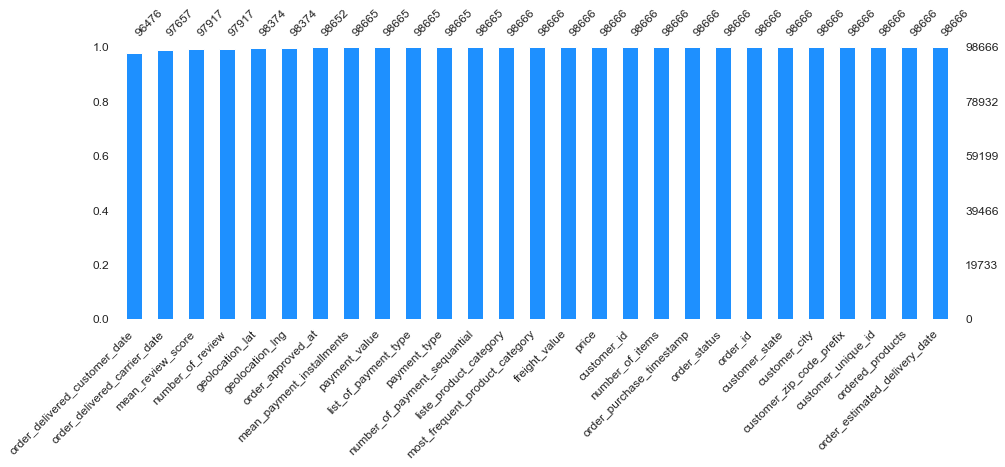

In [69]:
# Graphique du taux de remplissage des différentes variables
msno.bar(data_global,
         color="dodgerblue",
         sort="ascending",
         figsize=(15, 5),
         fontsize=12)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C32">3.2. Transformation des variables mentionnant une date en timestamp au lieu d'object</a></div>

Pour le projet, nous aurons besoin que les variables nous informant sur des dates soient au format date et non object.

In [70]:
# Liste des variables correspondant à une date
date_features = ["order_purchase_timestamp",
                 "order_approved_at",
                 "order_delivered_carrier_date",
                 "order_delivered_customer_date",
                 "order_estimated_delivery_date"]

# transformation au Dtype datetime
data_global[date_features] = data_global[date_features].\
                             apply(lambda _: pd.to_datetime(_,
                                                            format='%Y-%m-%d %H:%M:%S.%f'))

In [71]:
print("Date de la commande la plus ancienne:",
      data_global["order_purchase_timestamp"].min())
print("Date de la commande la plus récente:",
      data_global["order_purchase_timestamp"].max())

Date de la commande la plus ancienne: 2016-09-04 21:15:19
Date de la commande la plus récente: 2018-09-03 09:06:57


Nous disposons d'un historique de commande d'environ 2 ans pour ce projet

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C33">3.3. Analyse exploratoire</a></div>

### <div class="alert alert-block alert-info"><a name="C331">3.3.1. Nombre de commandes par clients</a></div>

In [72]:
# Connaitre les nombre de "customer_unique_id" présent dans le jeu de données
nb_customer_total = len(data_global["customer_unique_id"].unique())
print("Nombre de client total:", nb_customer_total)

# Connaitre le nombre de client n'ayant fait qu'une seule commande
nb_customer_single_order = len(data_global.groupby(["customer_unique_id"]).
                               size().loc[lambda x: x == 1].sort_values())
print("Nombre de client ayant une seule commande:", nb_customer_single_order)

# Connaitre le nombre de client ayant fait plusieurs commandes
nb_customer_several_order = len(data_global.groupby(["customer_unique_id"]).
                                size().loc[lambda x: x > 1].sort_values())
print("Nombre de client ayant plusieurs commandes:", nb_customer_several_order)


# Pourcentage de client ayant effectué plusieurs commandes
pourcentage_customer_single_order = ((nb_customer_single_order * 100)
                                     / nb_customer_total)

print("Pourcentage de clients ayant éffectué une seule commande:",
      pourcentage_customer_single_order,
      "%")

# Pourcentage de client ayant effectué plusieurs commandes
pourcentage_customer_several_orders = ((nb_customer_several_order * 100)
                                       / nb_customer_total)

print("Pourcentage de clients ayant éffectué plusieurs commandes:",
      pourcentage_customer_several_orders,
      "%")

Nombre de client total: 95420
Nombre de client ayant une seule commande: 92507
Nombre de client ayant plusieurs commandes: 2913
Pourcentage de clients ayant éffectué une seule commande: 96.94718088451059 %
Pourcentage de clients ayant éffectué plusieurs commandes: 3.0528191154894153 %


In [73]:
data_unique_customer_id = data_global.groupby("customer_unique_id").\
                                      agg({"customer_id": "count"}).reset_index()
data_unique_customer_id.columns = ["customer_unique_id", "number_of_orders"]
data_unique_customer_id.sort_values(by="number_of_orders", ascending=False)

,customer_unique_id,number_of_orders
52597,8d50f5eadf50201ccdcedfb9e2ac8455,16
23302,3e43e6105506432c953e165fb2acf44c,9
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37532,6469f99c1f9dfae7733b25662e7f1782,7
75560,ca77025e7201e3b30c44b472ff346268,7
...,...,...
32272,5657f9f721c16800a66c21081d46b18d,1
32271,5657dfebff5868c4dc7e8355fea865c4,1
32270,5657596addb4d7b07b32cd330614bdf8,1
32269,5656eb169546146caeab56c3ffc3d268,1


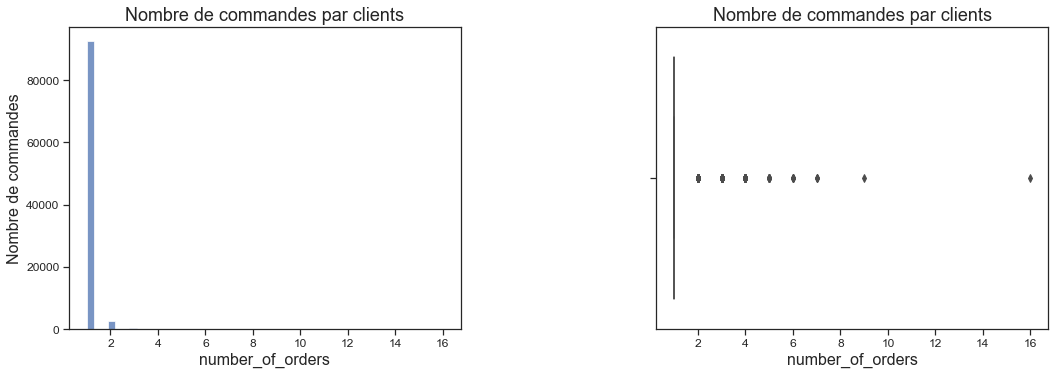

In [74]:
# Représenter graphiquement le nombre de commandes par client
fig = plt.figure(figsize=(8, 6))
plt.gcf().subplots_adjust(left=0.3,
                          bottom=0.3,
                          right=2.,
                          top=1,
                          wspace=0.5,
                          hspace=6)

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_unique_customer_id,
                   x="number_of_orders",
                   log_scale=False,
                   bins=50)
ax1.set_title("Nombre de commandes par clients")
ax1.set_ylabel("Nombre de commandes")

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(data=data_unique_customer_id,
                  x="number_of_orders")
ax2.set_title("Nombre de commandes par clients")
ax2.set_ylabel("")

plt.show()

Seulement 3,12% des clients ont fait plusieurs commandes (entre 2 et 17 commandes)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C332">3.3.2. Montant des commandes</a></div>

In [75]:
print("Nombre de produit avec 'price' = 0:",
      len(data_global.loc[(data_global["price"] == 0)
                          | (data_global["price"].isnull())]))
print("Nombre de produit avec 'freight_value' = 0:",
      len(data_global.loc[(data_global["freight_value"] == 0)
                          | (data_global["freight_value"].isnull())]))
print("Nombre de produit avec 'payment_value' = 0:",
      len(data_global.loc[(data_global["payment_value"] == 0)
                          | (data_global["payment_value"].isnull())]))

Nombre de produit avec 'price' = 0: 0
Nombre de produit avec 'freight_value' = 0: 338
Nombre de produit avec 'payment_value' = 0: 1


Le jeu de données contient des valeurs nulles (égale à 0) ou manquantes pour une des variables nous informant sur le montant des commandes.

**Traitement des valeurs manquantes pour "payment value"**

<AxesSubplot:>

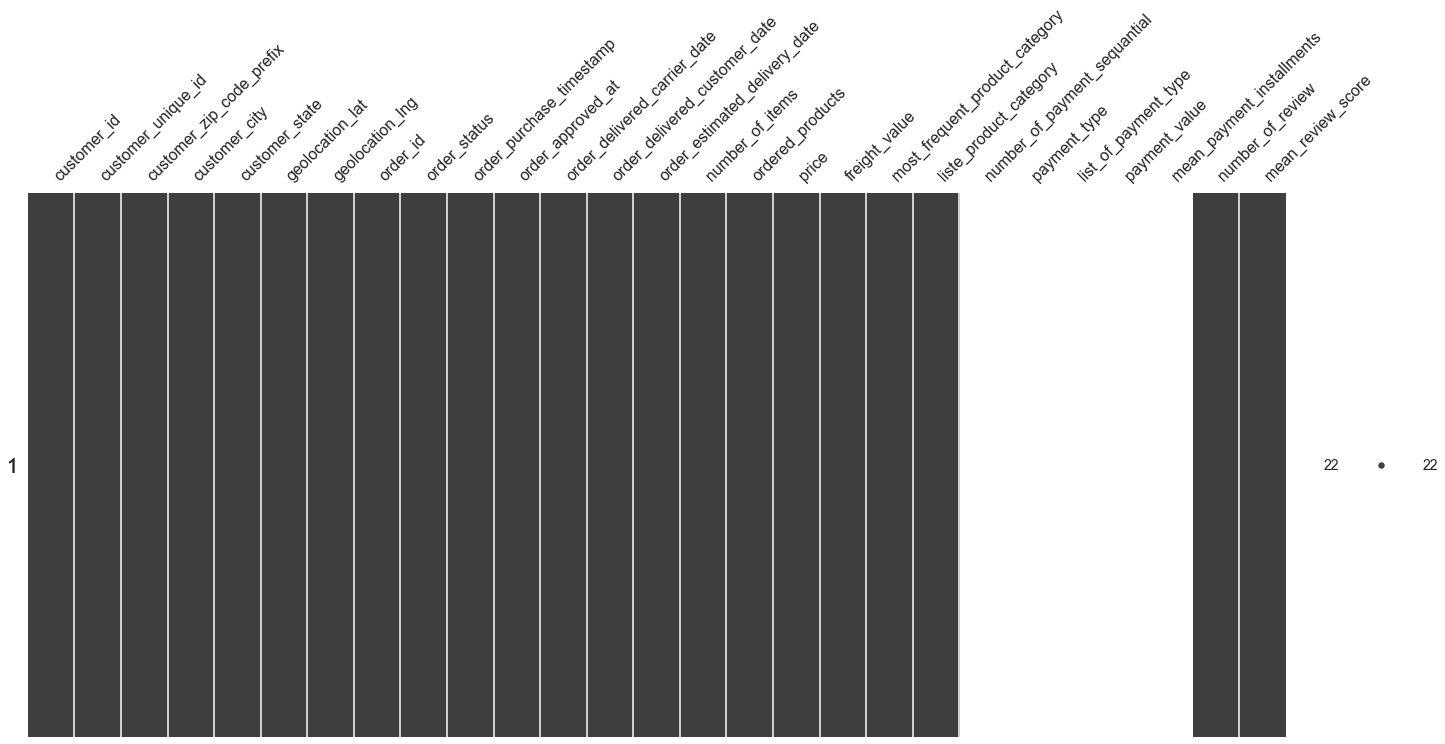

In [76]:
data_sans_payment = data_global.loc[(data_global["payment_value"] == 0)
                                    | (data_global["payment_value"].isnull())]

# Savoir si d'autres données sont manquantes
msno.matrix(data_sans_payment)

In [77]:
# Remplacement de la valeur manquante par price+freight_value
data_global.loc[((data_global["payment_value"] == 0)
                 | (data_global["payment_value"].isnull())),
                ["payment_value"]] = (data_global["price"]
                                      + data_global["freight_value"])

**A quoi ressemble la variable "payment_value" ?**

In [78]:
data_global[["payment_value"]].describe()

,payment_value
count,98666.000000
mean,160.606730
std,220.483141
min,9.590000
25%,62.000000
50%,105.290000
75%,176.880000
max,13664.080000


Avec la fonction describe, aucune valeur aberrante ne semble présente.

In [79]:
# Création d'une variable correspondant à la somme price + freight_value
data_global["price_including_freight"] = (data_global["price"]
                                          + data_global["freight_value"])

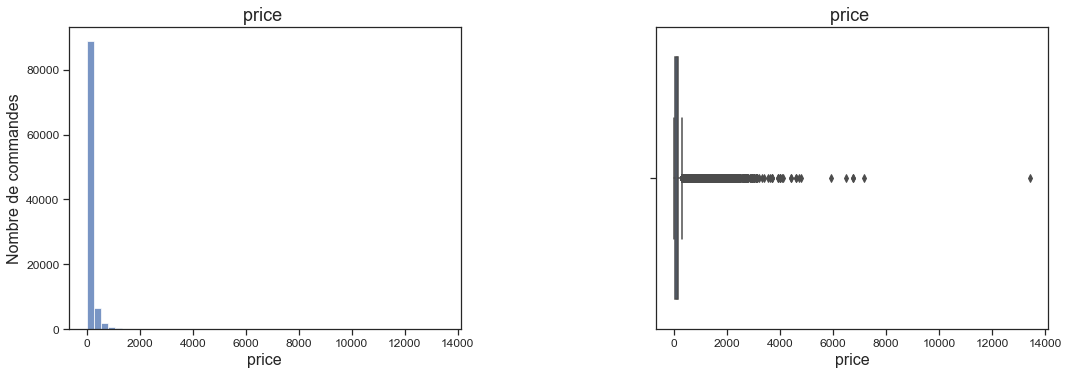

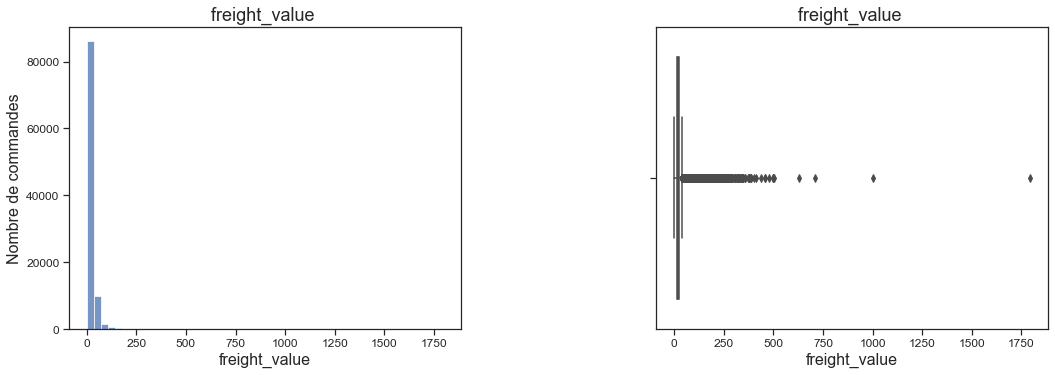

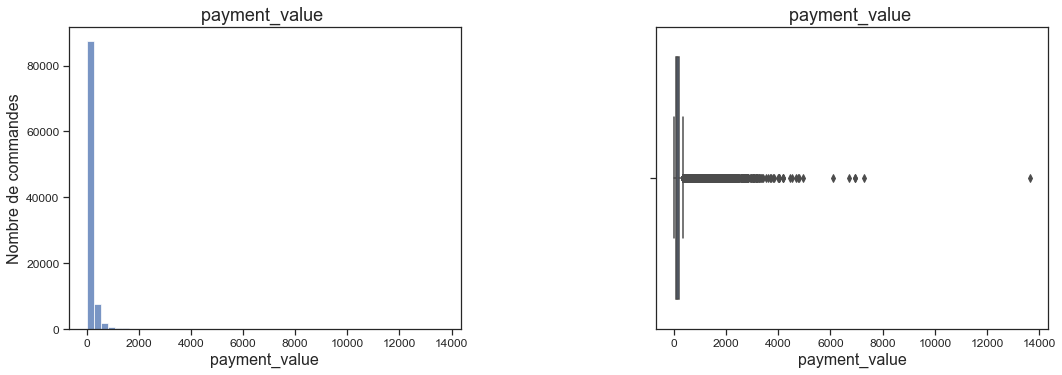

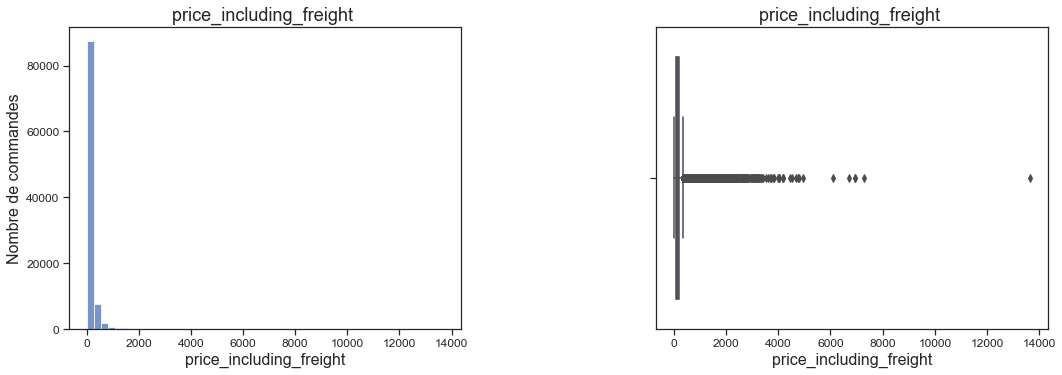

In [80]:
# Liste variable concernant l'argent
money_features = ["price",
                  "freight_value",
                  "payment_value",
                  "price_including_freight"]

# Représentation graphique pour visualiser les variables concernant l'argent
for mf in money_features:
    fig = plt.figure(figsize=(8, 6))
    plt.gcf().subplots_adjust(left=0.3,
                              bottom=0.3,
                              right=2.,
                              top=1,
                              wspace=0.5,
                              hspace=6)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data=data_global, x=mf, log_scale=False, bins=50)
    ax1.set_title("{variable} ".format(variable=mf))
    ax1.set_ylabel("Nombre de commandes")

    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.boxplot(data=data_global, x=mf)
    ax2.set_title("{variable} ".format(variable=mf))
    ax2.set_ylabel("")

plt.show()

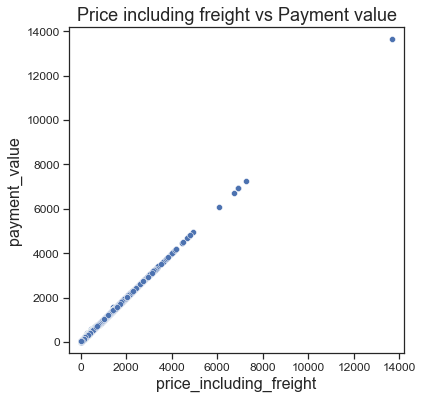

In [81]:
# Représentation graphique de price_including_freight vs payment_value
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax = sns.scatterplot(x="price_including_freight",
                     y="payment_value",
                     data=data_global)
ax.set_title("Price including freight vs Payment value".format(variable=mf))
ax.set_xlim(-500, 14200)
ax.set_ylim(-500, 14200)
plt.show()

In [82]:
# Création d'une variable freight ratio
data_global["freight_ratio"] = ((data_global["freight_value"] * 100)
                                / data_global["payment_value"])

**Transformation en échelle logarithmique**<br>
Avec les histogrammes de distribution, il est possible de remarquer que les variables "price" et "payment_value" ont une grande échelle. Lors du clustering, il sera intéressant de tester si les algorithmes utilisés ont de meilleurs performances si ces variables sont en échelle logarithmique. Pour réaliser ce test, je vais ajouter ces variables en échelle logarithmique dans le jeu de données.

In [83]:
# Création de nouvelles variables en échelle logarithmique
data_global["price_log"] = np.log(data_global['price'] + 1)
data_global["freight_value_log"] = np.log(data_global['freight_value'] + 1)
data_global["payment_value_log"] = np.log(data_global['payment_value'] + 1)

**Quel est le moyen de paiement le plus utilisé?**

Le moyen de payment le plus utilisé pour une commande est renseigné dans la variable payment_type.
La variable list_of_payment_type nous informe sur les différents moyens de paiement utilisé. Grâce à cette variable, je voudrait connaitre le nombre de moyen de paiment utilisés pour chaque commande.


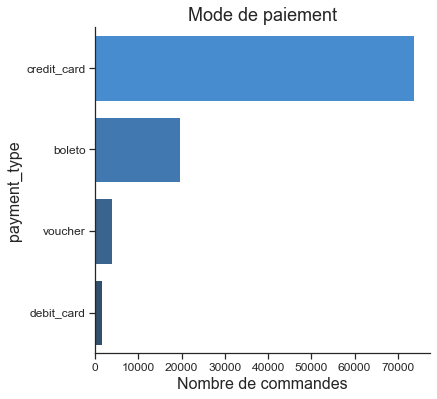

In [84]:
# Représentation graphique du moyen de paiment le plus utilisé par commande
label = data_global["payment_type"].value_counts().index.tolist()
colors = sns.dark_palette("#318ce7", reverse=True)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax = sns.countplot(y="payment_type",
                   data=data_global,
                   order=label,
                   palette=colors)
ax.set_xlabel("Nombre de commandes")
plt.title("Mode de paiement")
sns.despine()
plt.show()

In [85]:
# Nombre de moyen de paiement utilisé par commandes
data_payment_type = (data_global["list_of_payment_type"].
                     str.split(r"\,|:", expand=True))

data_global["number_of_payment_type"] = data_payment_type.notnull().sum(axis=1)

Text(0, 0.5, 'Nombre de commandes')

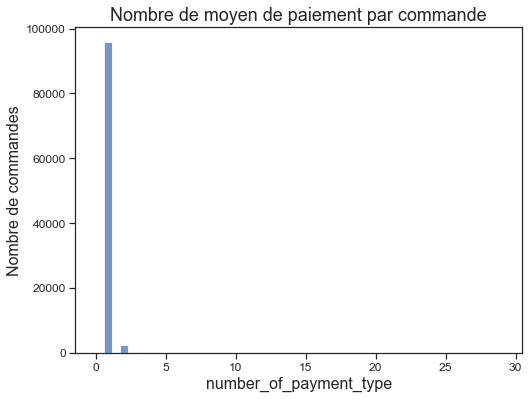

In [86]:
fig = plt.figure(figsize=(8, 6))
ax1 = sns.histplot(data=data_global,
                   x="number_of_payment_type",
                   log_scale=False,
                   bins=50)
ax1.set_title("Nombre de moyen de paiement par commande")
ax1.set_ylabel("Nombre de commandes")

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C333">3.3.3. Date des commandes</a></div>

In [87]:
# Déscription des variables correspondant au montant des commandes
data_global[["price", "freight_value", "payment_value"]].describe()

,price,freight_value,payment_value
count,98666.000000,98666.000000,98666.000000
mean,137.754076,22.823562,160.606730
std,210.645145,21.650909,220.483141
min,0.850000,0.000000,9.590000
25%,45.900000,13.850000,62.000000
50%,86.900000,17.170000,105.290000
75%,149.900000,24.040000,176.880000
max,13440.000000,1794.960000,13664.080000


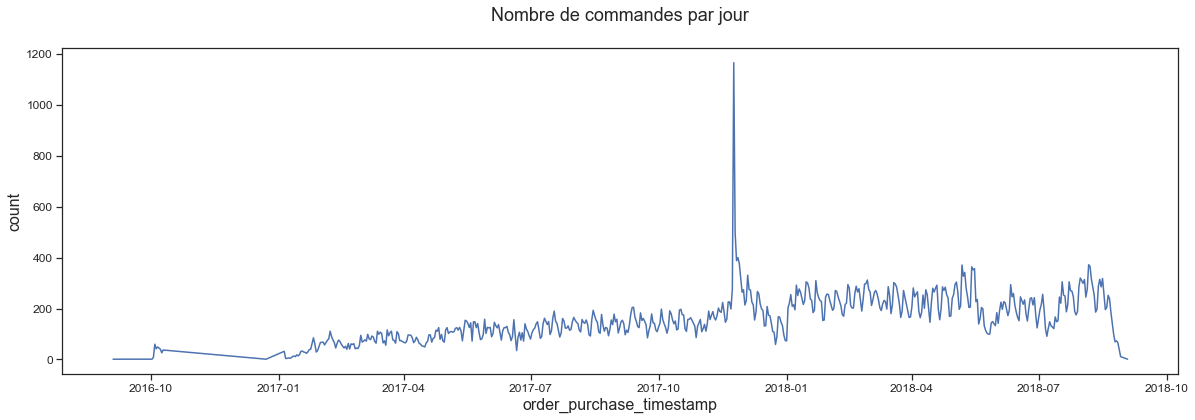

In [88]:
# Regroupement des commandes par jour
data_by_day = data_global.groupby(data_global["order_purchase_timestamp"]
                                  .dt.date).count()["order_id"]
data_by_day.columns = ["order_purchase_timestamp (per days)", "count"]

fig = plt.figure(figsize=(20, 6))
ax = data_by_day.plot()
ax.set_ylabel("count")
plt.title("Nombre de commandes par jour\n")
plt.show()

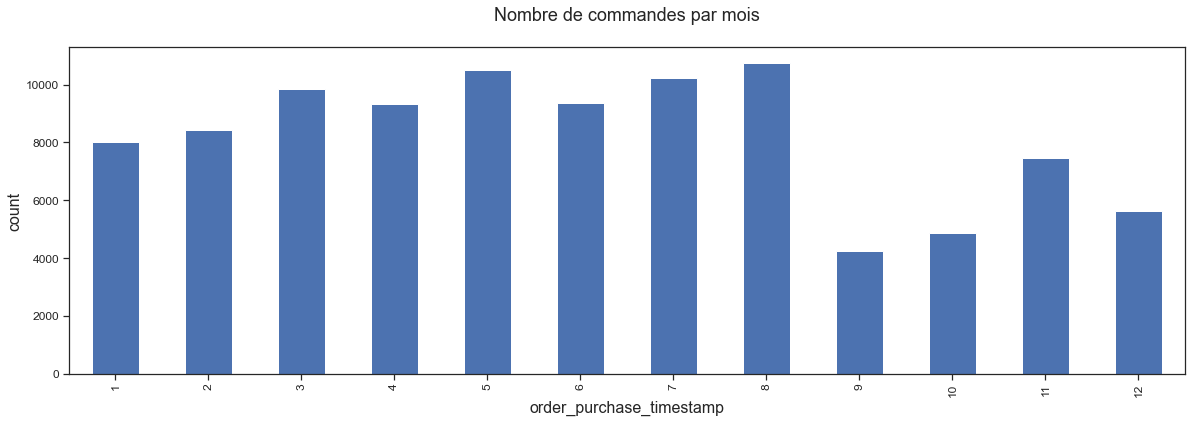

In [89]:
# Regroupement des commandes par mois
data_by_day = data_global.groupby(data_global["order_purchase_timestamp"]
                                  .dt.month).count()["order_id"]
data_by_day.columns = ["order_purchase_timestamp (per month)", "count"]

fig = plt.figure(figsize=(20, 6))
ax = data_by_day.plot(kind="bar")
ax.set_ylabel("count")
plt.title("Nombre de commandes par mois\n")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C334">3.3.4. Score donnée par le client</a></div>

In [90]:
data_by_score = data_global.groupby("mean_review_score")\
                           .agg({"order_id": "count"}).reset_index()
data_by_score.columns = ["review_score", "count"]
data_by_score

,review_score,count
0,1.0,10786
1,2.0,3096
2,3.0,8109
3,4.0,19041
4,5.0,56885


Text(0.5, 1.0, 'Score des différentes commandes')

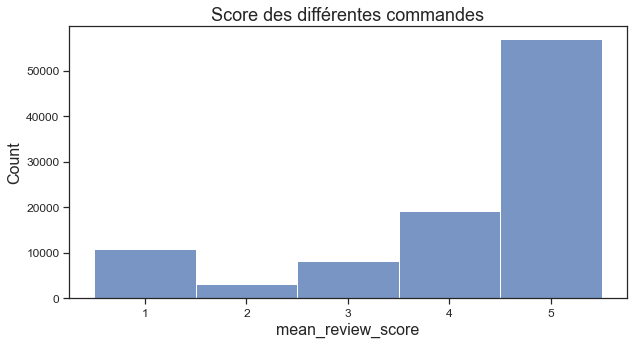

In [91]:
fig = plt.figure(figsize=(10, 5))
ax = sns.histplot(data=data_global,
                  x="mean_review_score",
                  discrete=True)
ax.set_title("Score des différentes commandes")

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C335">3.3.5. Analyse concernant les produits et leur catégories</a></div>

**Quelles sont les différentes catégories de produits?**

Nombre de catégories de produits: 72


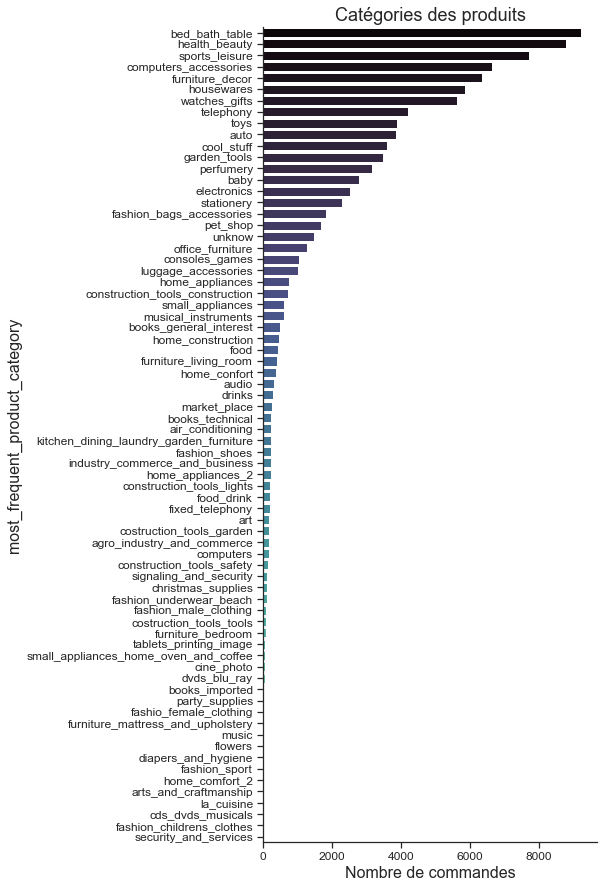

In [92]:
# Connaître le nombre de catégories
print("Nombre de catégories de produits:",
      len(data_global["most_frequent_product_category"].unique()))

# Représentation graphique
label = data_global["most_frequent_product_category"].value_counts()\
                                                     .index.tolist()
colors = sns.dark_palette("#318ce7", reverse=True)

fig = plt.figure(figsize=(6, 15))
ax = plt.axes()
ax = sns.countplot(y="most_frequent_product_category",
                   data=data_global,
                   order=label,
                   palette="mako")
ax.set_xlabel("Nombre de commandes")
plt.title("Catégories des produits")
sns.despine()
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C4">4. Préparation de jeu de données pour la segmentation</a></div>

## <div class="alert alert-block alert-info"><a name="C41">4.1. Jeu de données par commandes</a></div>

**Création d'une variable correspondant au délai de livraison**

Je défini le délai de livraison comme étant le nombre de jour entre la date de la commande ("order_purchase_timestamp") et la date de livraison ("order_estimated_delivery_date").

In [93]:
data_global["delivery_delay"] = ((data_global["order_estimated_delivery_date"]
                                 - data_global["order_purchase_timestamp"])
                                 .dt.days)

**Création d'une variable correspondant au nombre de catégorie dans lesquelles un client à acheter**

In [94]:
data_nb_cat = data_global["liste_product_category"].str.split(r",",
                                                              expand=True)
data_global['number_of_category'] = data_nb_cat.notnull().sum(axis=1)

**Sauvegarde du jeu de données au format csv**

In [95]:
data_global.to_csv("data_per_order.csv")

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C42">4.2. Jeu de données par clients</a></div>

### <div class="alert alert-block alert-info"><a name="C421">4.2.1. Création du jeu de données</a></div>

**Détermination de la date la plus récente du jeu de données**

Cette date sera utilisée pour calculer le nombre de jour depuis la dernière commande pour chaque client et donc la récence.

In [96]:
# Détermination de la date la plus récente
max_date = (max(data_global["order_purchase_timestamp"])
            + datetime.timedelta(days=1))
print("La date la plus récente est:",
      max_date)

La date la plus récente est: 2018-09-04 09:06:57


**Création du jeu de données par clients**

A partir du jeu de données par commande, une aggrégation est réalisée sur "customer_unique_id" pour avoir une valeur par client unique.

In [97]:
df_customer = data_global.groupby("customer_unique_id")\
                         .agg({"customer_id": "count",
                               "customer_city": "max",
                               "customer_state": "max",
                               "geolocation_lat": "mean",
                               "geolocation_lng": "mean",
                               "order_purchase_timestamp": (lambda x:
                                                            (max_date - x.max()).days),
                               "delivery_delay": "mean",
                               "number_of_items": "sum",
                               "price": "sum",
                               "price_log": "sum",
                               "freight_value": "sum",
                               "freight_value_log": "sum",
                               "price_including_freight": "sum",
                               "payment_value": ["sum", "mean"],
                               "payment_value_log": ["sum", "mean"],
                               "freight_ratio": "mean",
                               "number_of_payment_sequantial": "sum",
                               "mean_payment_installments": "mean",
                               "payment_type": "max",
                               "number_of_payment_type": "sum",
                               "most_frequent_product_category": "max",
                               "number_of_category": "mean",
                               "number_of_review": "sum",
                               "mean_review_score":"mean"
                               }).reset_index()

df_customer.columns = ["customer_unique_id",
                       "number_of_order",
                       "customer_city",
                       "customer_state",
                       "latitude",
                       "longitude",
                       "number_of_days_since_last_order",
                       "mean_delivery_delay",
                       "number_of_items",
                       "price",
                       "price_log",
                       "freight_value",
                       "freight_value_log",
                       "price_including_freight",
                       "payment_value",
                       "mean_payment_value",
                       "payment_value_log",
                       "mean_payment_log",
                       "mean_freight_ratio",
                       "number_of_payment_sequantial",
                       "mean_payment_installments",
                       "payment_type",
                       "number_of_payment_type",
                       "most_frequent_product_category",
                       "number_of_category",
                       "number_of_review",
                       "mean_review_score"]

In [98]:
# Vérification de la taille du jeu de données
df_customer.shape

(95420, 27)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C422">4.2.2. Vérification des variables du jeu de données créé</a></div>

#### <div class="alert alert-block alert-info"><a name="C4221">4.2.2.1. Valeurs manquantes</a></div>

<AxesSubplot:>

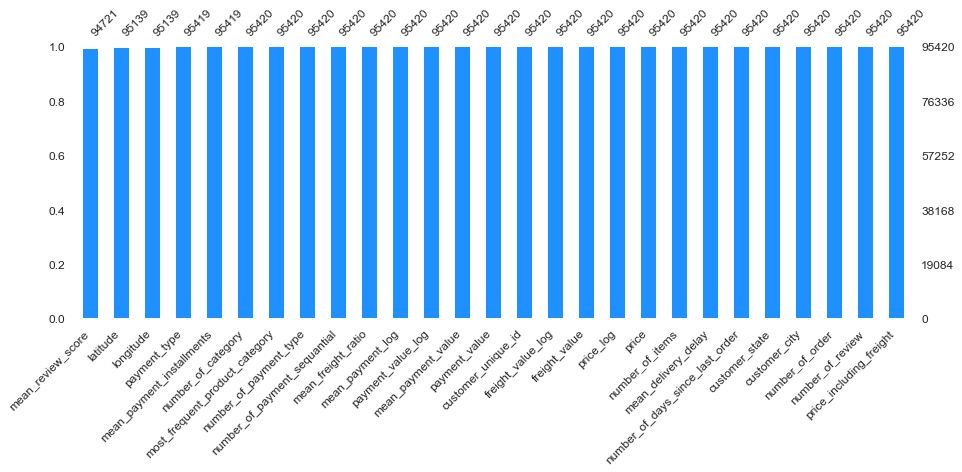

In [99]:
# Graphique du taux de remplissage des différentes variables
msno.bar(df_customer,
         color="dodgerblue",
         sort="ascending",
         figsize=(15, 5),
         fontsize=12)

Le jeu de données créé contient trés peu de valeurs manquantes. 

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

#### <div class="alert alert-block alert-info"><a name="C4222">4.2.2.2. Nombre de commandes</a></div>

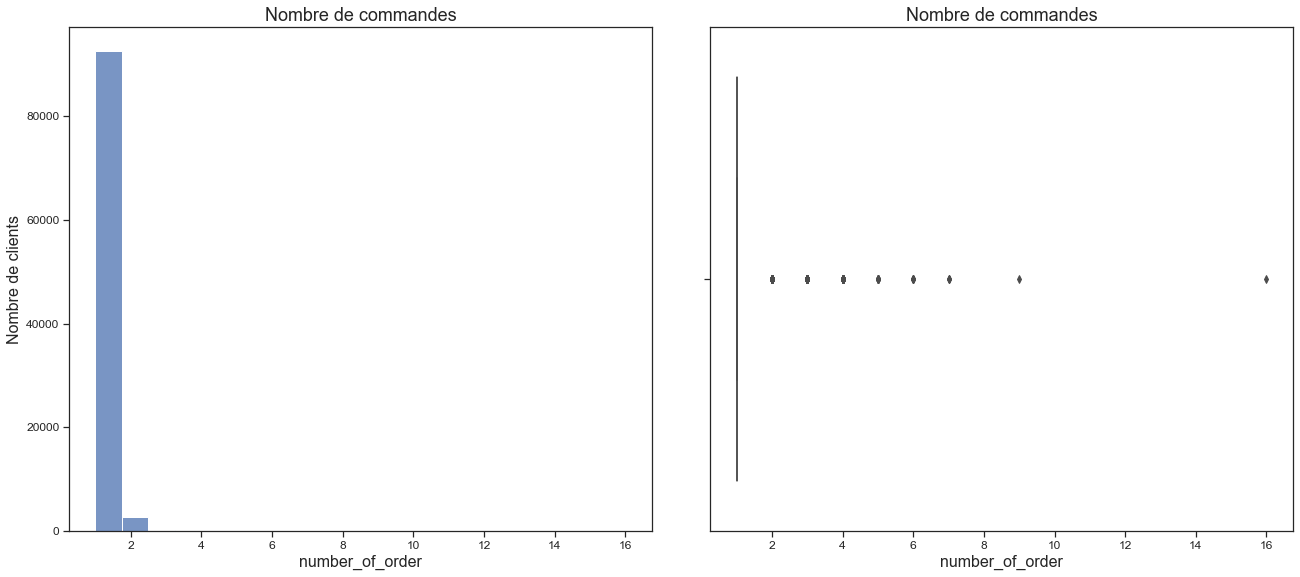

In [100]:
# Caractéristique de la figure
fig = plt.figure(figsize=(10, 10))
plt.gcf().subplots_adjust(left=0.3,
                          bottom=0.3,
                          right=2.,
                          top=1,
                          wspace=0.1,
                          hspace=6)

# Histogramme de distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=df_customer,
                   x="number_of_order",
                   log_scale=False,
                   bins=20)
ax1.set_title("Nombre de commandes")
ax1.set_ylabel("Nombre de clients")

# Boxplot
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(data=df_customer,
                  x="number_of_order")
ax2.set_title("Nombre de commandes")
ax2.set_ylabel("")

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

#### <div class="alert alert-block alert-info"><a name="C4223">4.2.2.3. Nombre de produits achetés par chaque client</a></div>

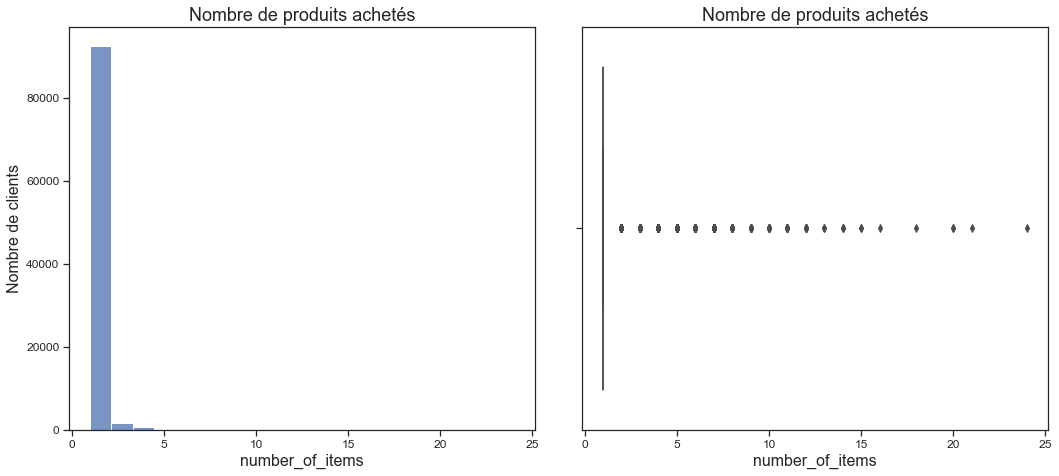

In [101]:
# Caractéristique de la figure
fig = plt.figure(figsize=(8, 8))
plt.gcf().subplots_adjust(left=0.3,
                          bottom=0.3,
                          right=2.,
                          top=1,
                          wspace=0.1,
                          hspace=6)

# Histogramme de distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=df_customer,
                   x="number_of_items",
                   log_scale=False,
                   bins=20)
ax1.set_title("Nombre de produits achetés")
ax1.set_ylabel("Nombre de clients")

# Boxplot
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(data=df_customer,
                  x="number_of_items")
ax2.set_title("Nombre de produits achetés")
ax2.set_ylabel("")

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


#### <div class="alert alert-block alert-info"><a name="C4224">4.2.2.4. Variables concernant la valeur monétaire des achats</a></div>

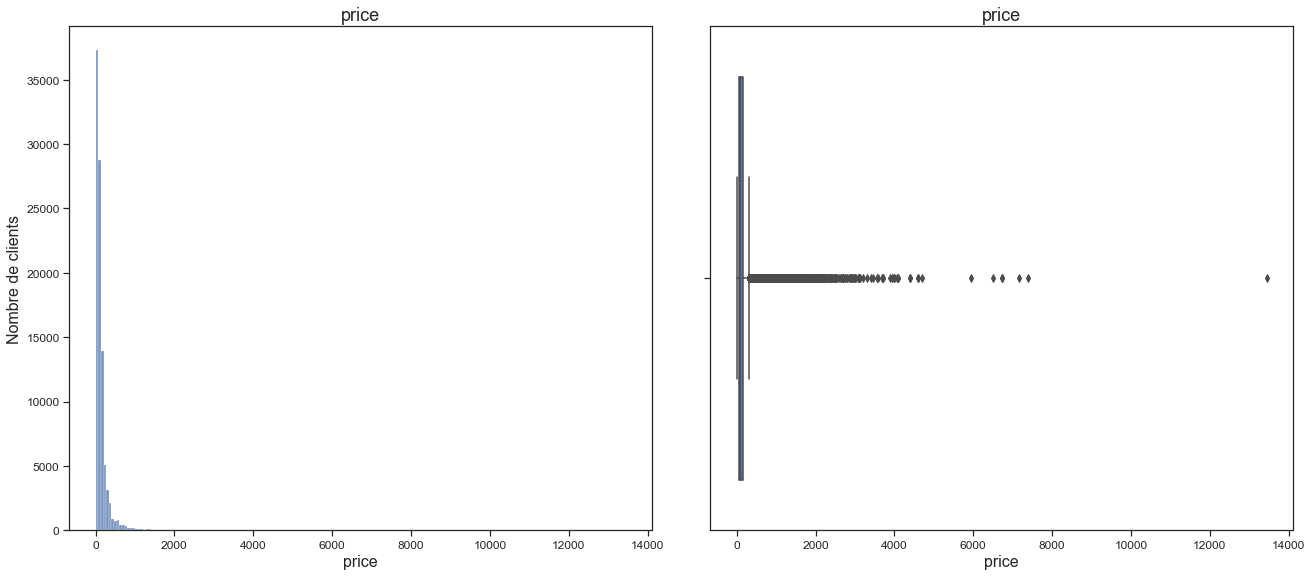

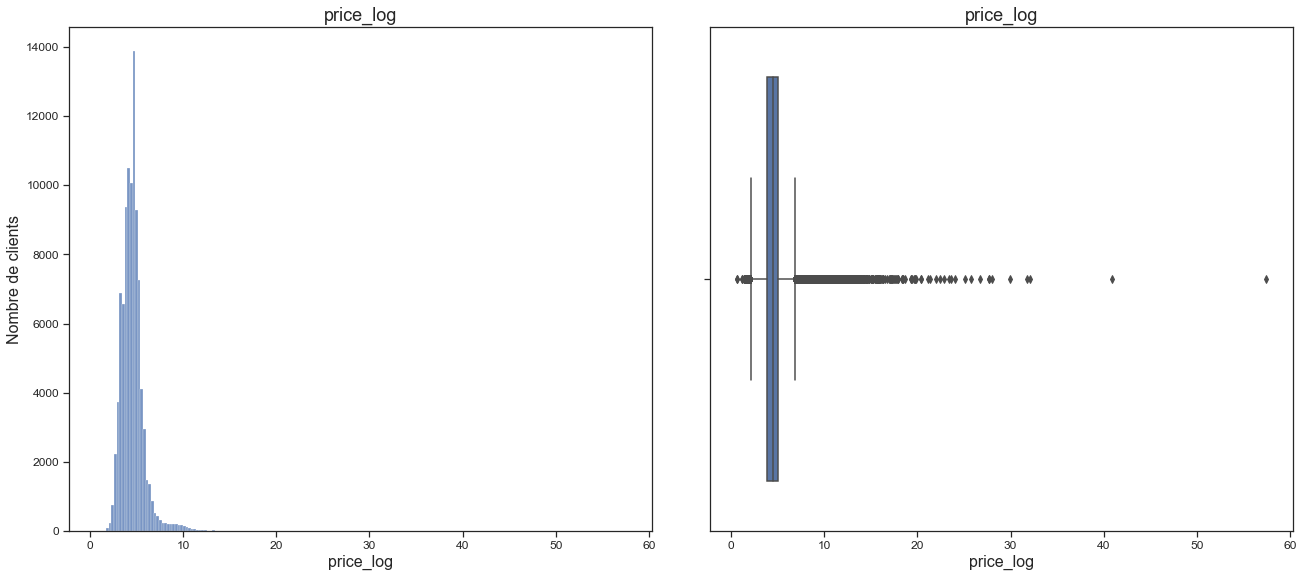

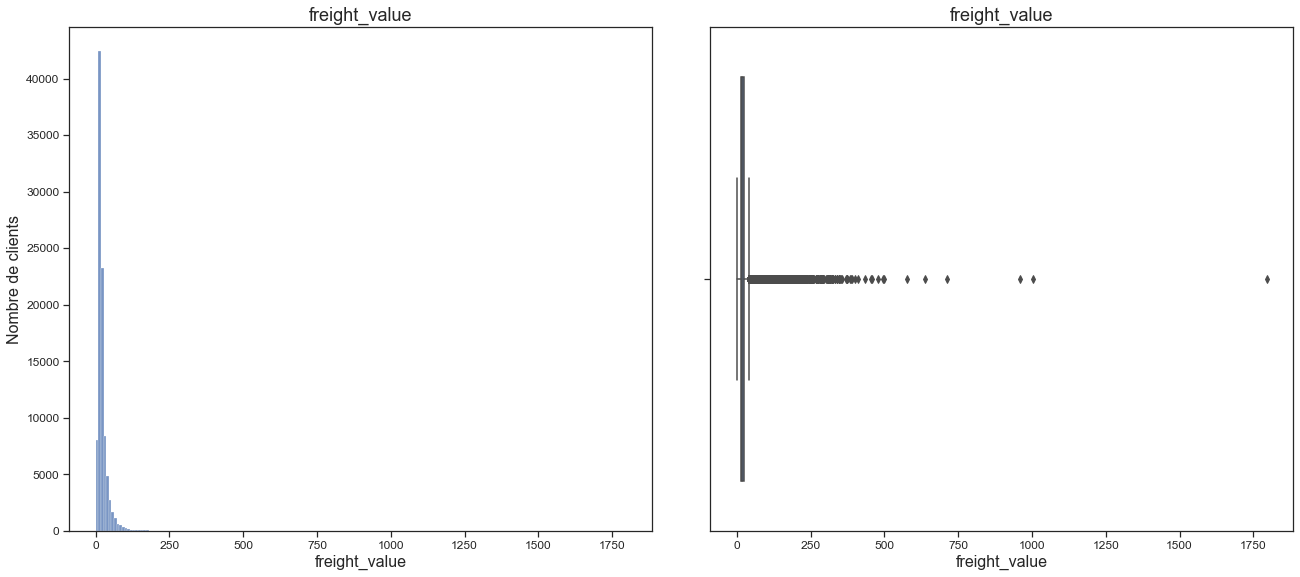

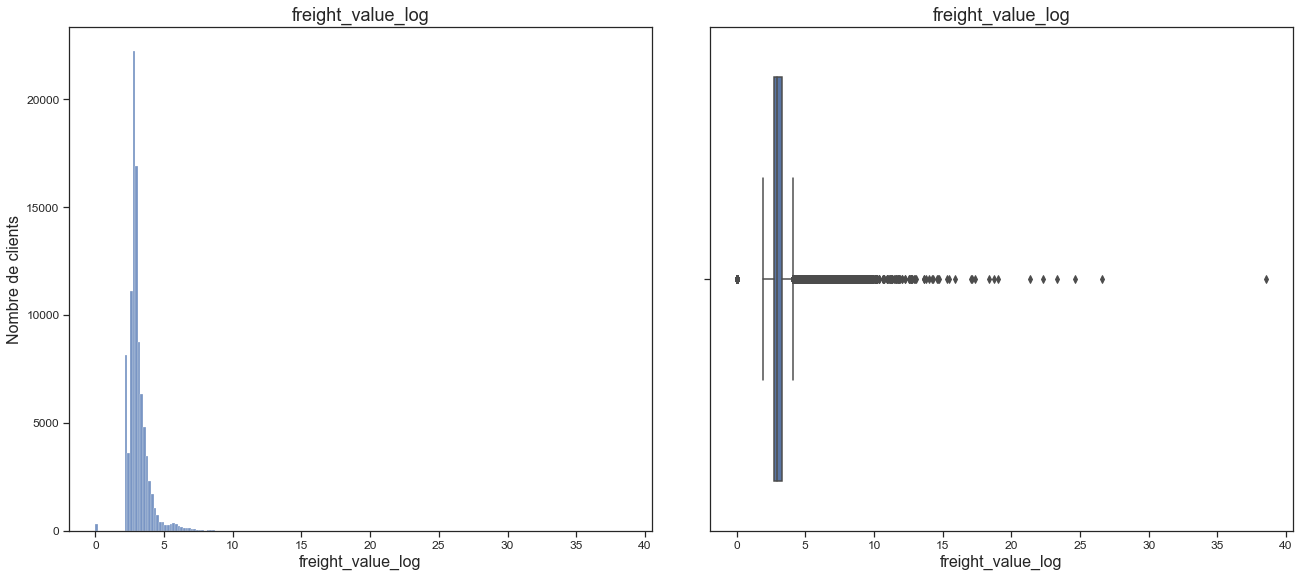

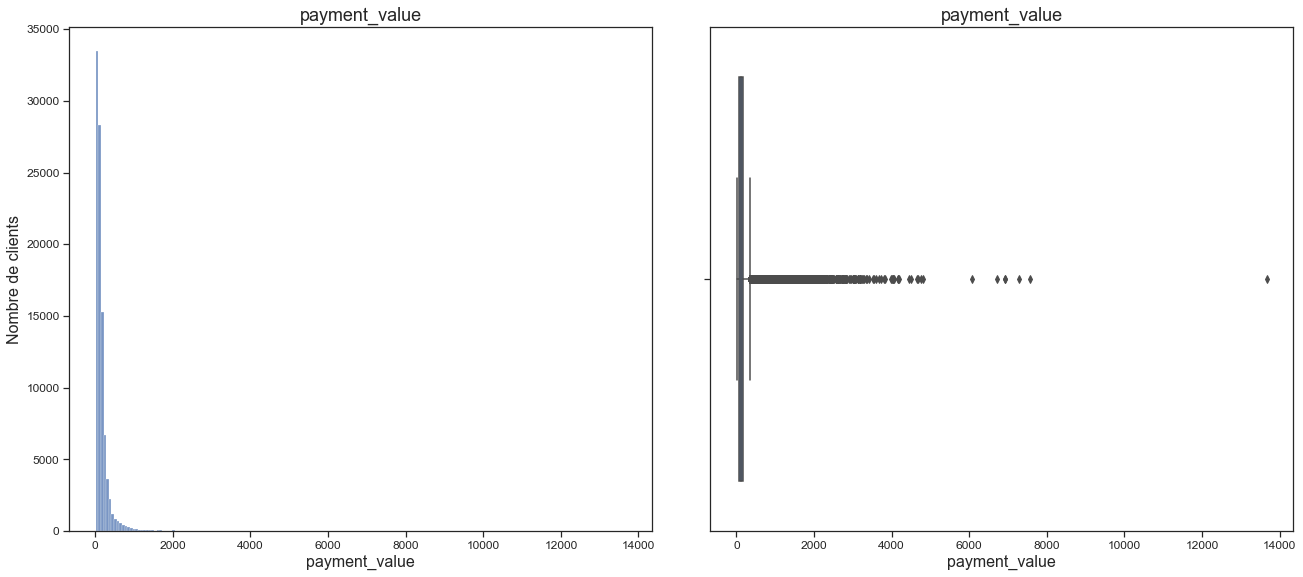

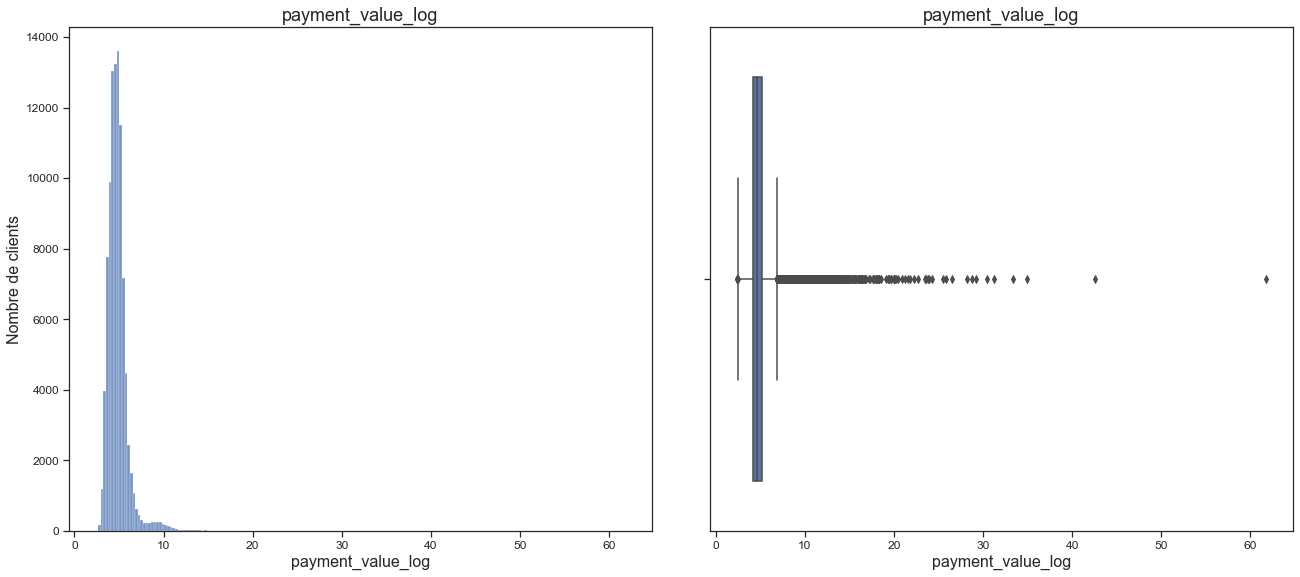

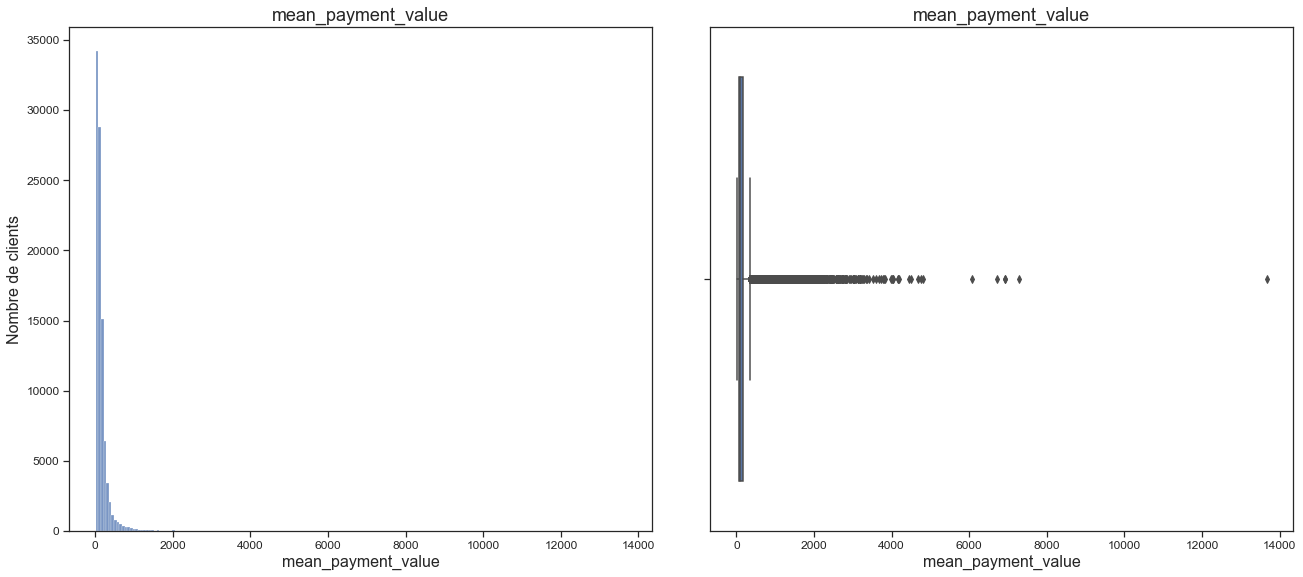

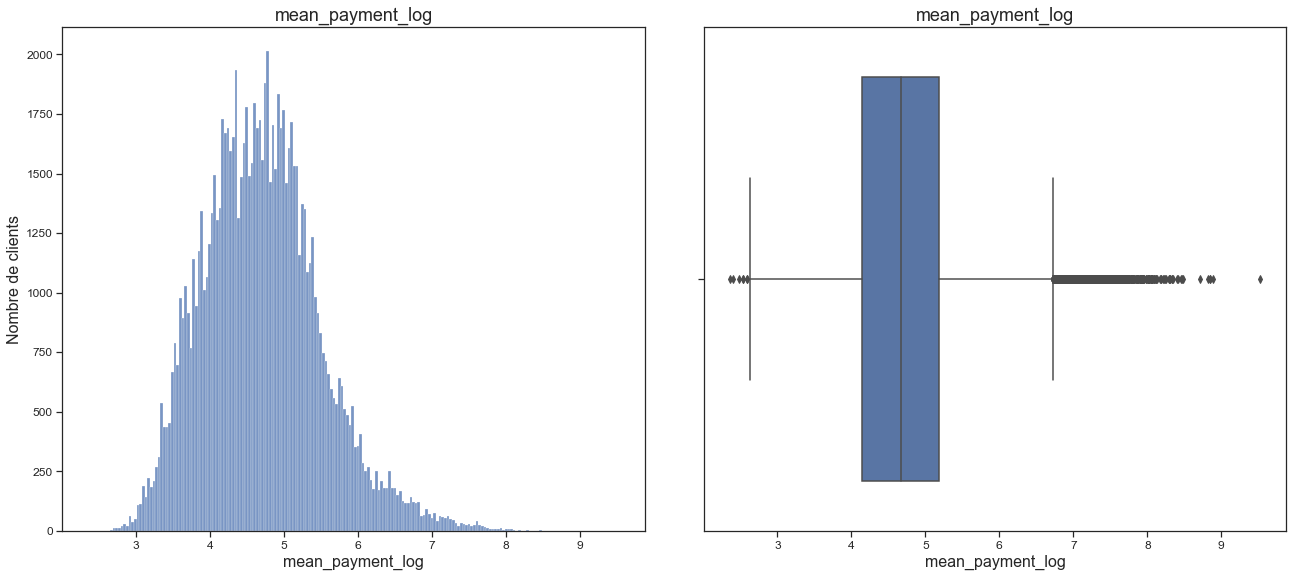

In [102]:
variables = ["price", "price_log",
             "freight_value", "freight_value_log",
             "payment_value", "payment_value_log",
             "mean_payment_value", "mean_payment_log"]

for v in variables:
    # Caractéristique de la figure
    fig = plt.figure(figsize=(10, 10))
    plt.gcf().subplots_adjust(left=0.3,
                              bottom=0.3,
                              right=2.,
                              top=1,
                              wspace=0.1,
                              hspace=6)

    # Histogramme de distribution
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data=df_customer,
                       x=v,
                       log_scale=False,
                       bins=200)
    ax1.set_title("{variable}".format(variable=v))
    ax1.set_ylabel("Nombre de clients")

    # Boxplot
    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.boxplot(data=df_customer,
                      x=v)
    ax2.set_title("{variable}".format(variable=v))
    ax2.set_ylabel("")

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C4225">4.2.2.5. Nombre de jour depuis la dernière commande</a></div>

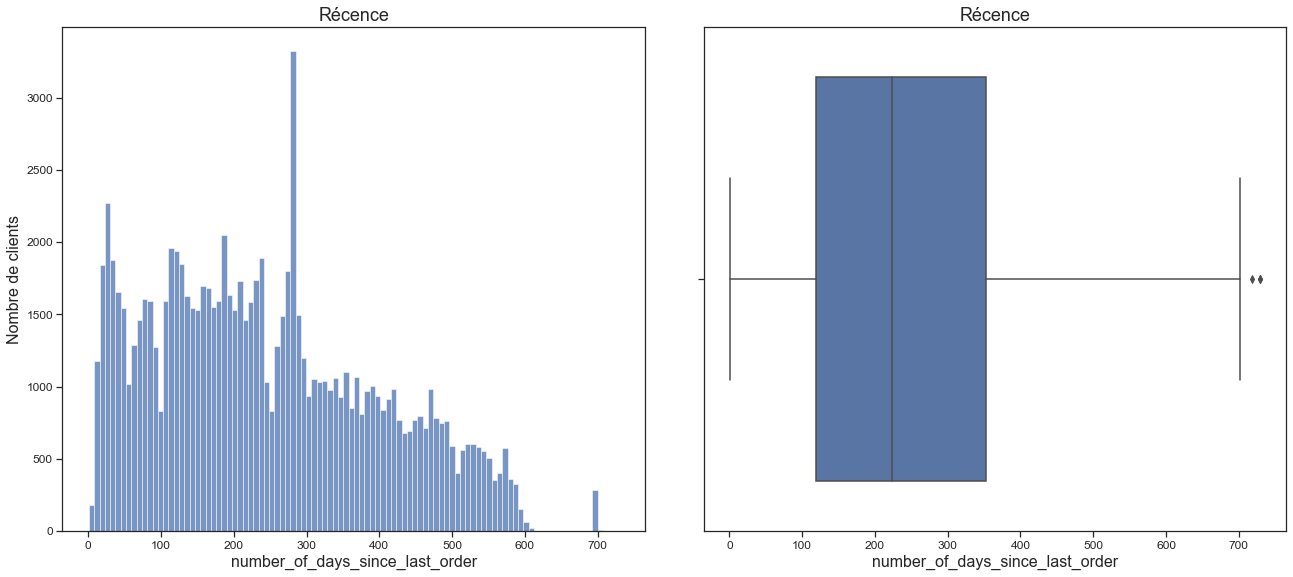

In [103]:
# Caractéristique de la figure
fig = plt.figure(figsize=(10, 10))
plt.gcf().subplots_adjust(left=0.3,
                          bottom=0.3,
                          right=2.,
                          top=1,
                          wspace=0.1,
                          hspace=6)

# Histogramme de distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=df_customer,
                   x="number_of_days_since_last_order",
                   log_scale=False,
                   bins=100)
ax1.set_title("Récence")
ax1.set_ylabel("Nombre de clients")

# Boxplot
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(data=df_customer,
                  x="number_of_days_since_last_order")
ax2.set_title("Récence")
ax2.set_ylabel("")

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C4226">4.2.2.6. Matrice de corrélation</a></div>

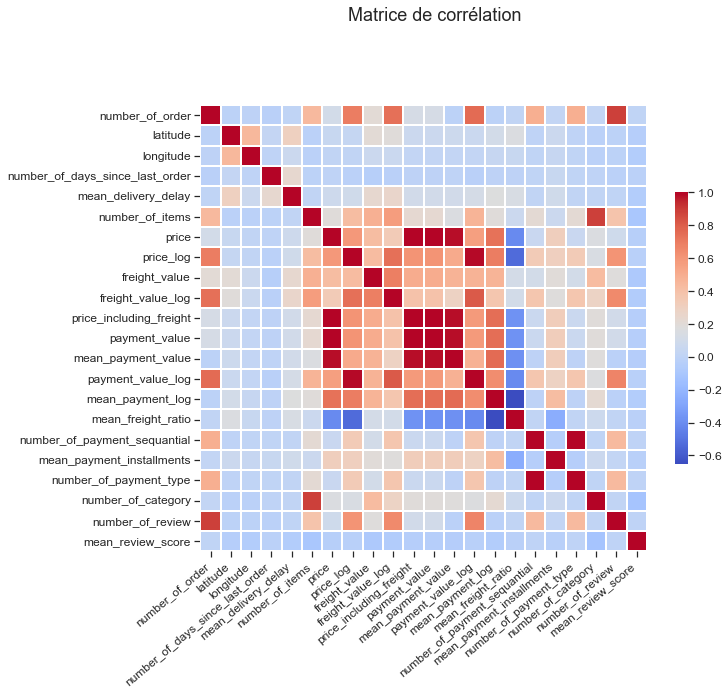

In [104]:
# Corrélation entre les variables
data_corr = df_customer.corr()

# Représentation graphique de la matrice de corrélation
fig = plt.figure(figsize=(10, 10))
fig.text(0.45,
         0.93,
         "Matrice de corrélation",
         ha='center',
         fontsize=18)
ax = sns.heatmap(data_corr,
                 square=True,
                 linewidths=0.01,
                 cmap="coolwarm",
                 cbar_kws={"shrink":.5})
plt.setp(ax.get_xticklabels(),
         rotation=40,
         ha="right")
plt.show()

**Sauvegarde sous format CSV**

In [105]:
df_customer.to_csv("data_per_customer.csv")